In [1]:
import pandas as pd
from glob import glob
from PIL import Image

In [2]:
path = r'../original_dataset/'

In [3]:
files = sorted(glob(path+'*.csv'))

In [4]:
files

['../original_dataset\\dangjin_fcst_data.csv',
 '../original_dataset\\dangjin_obs_data.csv',
 '../original_dataset\\energy.csv',
 '../original_dataset\\sample_submission.csv',
 '../original_dataset\\site_info.csv',
 '../original_dataset\\ulsan_fcst_data.csv',
 '../original_dataset\\ulsan_obs_data.csv']

In [5]:
dangjin_fcst_data = pd.read_csv(files[0])
dangjin_obs_data = pd.read_csv(files[1])
energy = pd.read_csv(files[2])
sample_submission = pd.read_csv(files[3])
site_info = pd.read_csv(files[4])
ulsan_fcst_data = pd.read_csv(files[5])
ulsan_obs_data = pd.read_csv(files[6])

## site_info.csv - 발전소 정보
- Id : 사이트 식별자
- Capacity : 발전소 발전용량(MW)
- Address : 주소
- InstallationAngle : 설치각(º)
- IncidentAngle : 입사각(º)
- Latitude : 위도
- Longitude : 경도

In [6]:
site_info

,Id,Capacity,Address,InstallationAngle,IncidentAngle,Latitude,Longitude
0,당진수상태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
1,당진자재창고태양광,0.7,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
2,당진태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
3,울산태양광,0.5,울산광역시 남구 용잠로 623,20.0,20.0,35.477651,129.380778


## energy.csv - 발전소별 발전량

- time : 1시간 단위 계량된 시간 (ex-2018-03-01 1:00:00 =>  2018-03-01 00:00:00 ~ 2018-03-01 1:00:00 1시간동안 발전량 계량)
- dangjin_floating : 당진수상태양광 발전량(KW)
- dangjin_warehouse : 당진자재창고태양광 발전량(KW)
- dangjin : 당진태양광 발전량(KW)
- ulsan : 울산태양광 발전량(KW)

In [7]:
energy

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0
...,...,...,...,...,...
25627,2021-01-31 20:00:00,0.0,0.0,0,0
25628,2021-01-31 21:00:00,0.0,0.0,0,0
25629,2021-01-31 22:00:00,0.0,0.0,0,0
25630,2021-01-31 23:00:00,0.0,0.0,0,0


## dangjin_fcst_data.csv - 당진지역 발전소 동네 예보

- Forecast time : 예보 발표 시점
- forecast : 예보 시간 (ex - Forecast time:2018-03-01 11:00:00, forecast:4.0 => 2018-03-01 11:00:00에 발표한 2018-03-01 15:00:00 예보

### 예보 발표 시점 'forecast'시간 후 기상 예보

- Temperature : 온도(℃)
- Humidity : 습도(%)
- WindSpeed : 풍속(m/s)
- WindDirection : 풍향(º)
- Cloud : 하늘상태(1-맑음, 2-구름보통, 3-구름많음, 4-흐림)

출처 : 기상청 동네예보(https://data.kma.go.kr/data/rmt/rmtList.do?code=420&pgmNo=572)

※ 기상청 동네예보는 1개월 단위로 배포 되며 실시간 정보는 '공공데이터포털'의 '동네예보 조회서비스' API를 통해 확인 가능

In [8]:
dangjin_fcst_data

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0
...,...,...,...,...,...,...,...
162203,2021-03-01 08:00:00,52.0,7.0,40.0,3.2,187.0,1.0
162204,2021-03-01 08:00:00,55.0,8.0,40.0,4.5,217.0,1.0
162205,2021-03-01 08:00:00,58.0,5.0,55.0,2.2,210.0,1.0
162206,2021-03-01 08:00:00,61.0,1.0,80.0,1.9,164.0,1.0


## dangjin_obs_data.csv - 당진지역 발전소 인근 기상 관측 자료

- 지점 : 지점 코드
- 지점명 : 관측소 지점
- 일시 : 관측 시간
- 기온(°C) : 기온(°C)
- 풍속(m/s) : 풍속(m/s)
- 풍향(16방위) : 풍향(º)
- 습도(%) : 습도(%)
- 전운량(10분위) : 전운량(낮을 수록 구름이 적음)

출처 : 기상청 기상관측(https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36)

In [9]:
dangjin_obs_data

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00,2.2,2.1,180.0,97.0,NaN
...,...,...,...,...,...,...,...,...
25621,129,서산,2021-01-31 19:00,6.7,1.5,200.0,75.0,8.0
25622,129,서산,2021-01-31 20:00,6.2,0.8,200.0,77.0,8.0
25623,129,서산,2021-01-31 21:00,5.3,0.7,230.0,82.0,8.0
25624,129,서산,2021-01-31 22:00,5.8,1.0,200.0,77.0,8.0


## ulsan_fcst_data.csv - 울산지역 발전소 동네 예보

- Forecast time : 예보 발표 시점
- forecast : 예보 시간 (ex - Forecast time:2018-03-01 11:00:00, forecast:4.0 => 2018-03-01 11:00:00에 발표한 2018-03-01 15:00:00 예보

### 예보 발표 시점 'forecast'시간 후 기상 예보

- Temperature : 온도(℃)
- Humidity : 습도(%)
- WindSpeed : 풍속(m/s)
- WindDirection : 풍향(º)
- Cloud : 하늘상태(1-맑음, 2-구름보통, 3-구름많음, 4-흐림)

출처 : 기상청 동네예보(https://data.kma.go.kr/data/rmt/rmtList.do?code=420&pgmNo=572)

※ 기상청 동네예보는 1개월 단위로 배포 되며 실시간 정보는 '공공데이터포털'의 '동네예보 조회서비스' API를 통해 확인 가능

In [10]:
ulsan_fcst_data

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,8.0,20.0,14.0,298.0,2.0
1,2018-03-01 11:00:00,7.0,4.0,20.0,4.3,298.0,2.0
2,2018-03-01 11:00:00,10.0,3.0,30.0,1.9,309.0,2.0
3,2018-03-01 11:00:00,13.0,0.0,40.0,1.5,318.0,2.0
4,2018-03-01 11:00:00,16.0,-1.0,45.0,1.8,308.0,2.0
...,...,...,...,...,...,...,...
162203,2021-03-01 08:00:00,52.0,9.0,45.0,3.1,83.0,3.0
162204,2021-03-01 08:00:00,55.0,9.0,45.0,3.0,111.0,3.0
162205,2021-03-01 08:00:00,58.0,8.0,55.0,2.2,122.0,3.0
162206,2021-03-01 08:00:00,61.0,6.0,65.0,0.9,131.0,3.0


## ulsan_obs_data.csv - 울산지역 발전소 인근 기상 관측 자료

- 지점 : 지점 코드
- 지점명 : 관측소 지점
- 일시 : 관측 시간
- 기온(°C) : 기온(°C)
- 풍속(m/s) : 풍속(m/s)
- 풍향(16방위) : 풍향(º)
- 습도(%) : 습도(%)
- 전운량(10분위) : 전운량(낮을 수록 구름이 적음)

출처 : 기상청 기상관측(https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36)

In [11]:
ulsan_obs_data

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,152,울산,2018-03-01 00:00,8.2,3.9,340.0,98.0,10.0
1,152,울산,2018-03-01 01:00,7.0,4.1,320.0,97.0,10.0
2,152,울산,2018-03-01 02:00,6.5,5.9,290.0,80.0,NaN
3,152,울산,2018-03-01 03:00,6.2,4.6,320.0,79.0,3.0
4,152,울산,2018-03-01 04:00,6.7,4.5,320.0,73.0,1.0
...,...,...,...,...,...,...,...,...
25627,152,울산,2021-01-31 19:00,8.8,2.5,200.0,50.0,5.0
25628,152,울산,2021-01-31 20:00,8.7,3.9,200.0,49.0,1.0
25629,152,울산,2021-01-31 21:00,8.4,2.4,230.0,51.0,7.0
25630,152,울산,2021-01-31 22:00,9.4,3.3,230.0,51.0,8.0


## sample_submission.csv - 예측한 발전량 제출 양식

- publci LB : 2021년 2월 예측
- private LB : 2021년 6월 9일 ~ 2021년 7월 8일 30일간 예측, 평가기간 제출 가능, 예측 전날 선택된 제출물 평가

※주의1 : 2021년 2월 예측시점 전날에 확인 가능한 정보만을 feature로 사용 가능, fcst 데이터 사용시 주의

※주의2 : public 평가기간 data leakage가 의심되는 경우 코드 제출을 요청할 수 있으며 2일 내 미제출 또는 data leakage가 확인 되었을 시 LB 기록이 삭제

※주의3 : 대회 기간 동안 지속적인 data leakage가 확인된 팀은 참가 자격 박탈

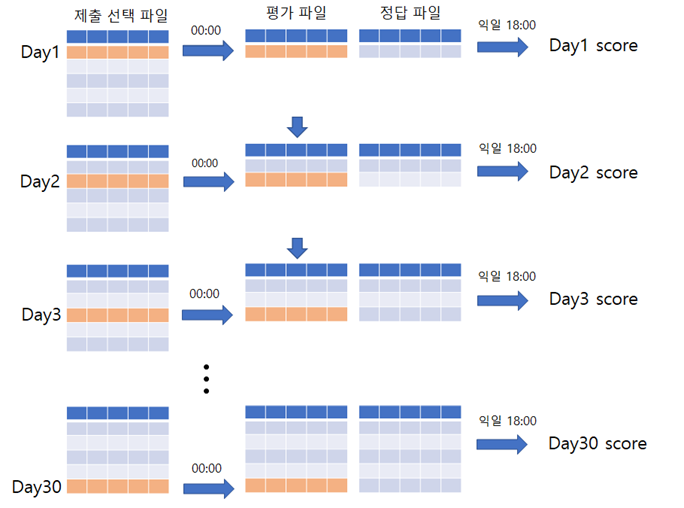

In [12]:
Image.open('private.png')

- time : 지난 한시간동안 발전량 예측
- dangjin_floating : 당진수상태양광 예측 발전량(KW)
- dangjin_warehouse : 당진자재창고태양광 예측 발전량(KW)
- ulsan : 울산태양광 예측 발전량(KW)

In [13]:
sample_submission

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2021-02-01 01:00:00,0,0,0,0
1,2021-02-01 02:00:00,0,0,0,0
2,2021-02-01 03:00:00,0,0,0,0
3,2021-02-01 04:00:00,0,0,0,0
4,2021-02-01 05:00:00,0,0,0,0
...,...,...,...,...,...
1387,2021-07-08 20:00:00,0,0,0,0
1388,2021-07-08 21:00:00,0,0,0,0
1389,2021-07-08 22:00:00,0,0,0,0
1390,2021-07-08 23:00:00,0,0,0,0


## 평가 산식(NMAE-10)

- 4개의 발전소 반전량을하나로 합하여 평가
- 4개 발전소 총 발전용량으로 정규화
- 발전용량의 10% 이상 발전된 데이터만으로 평가

In [14]:
import pandas as pd
import numpy as np

def sola_nmae(answer_df, submission_df):
    submission = submission_df[submission_df['time'].isin(answer_df['time'])]
    submission.index = range(submission.shape[0])
    
    # 시간대별 총 발전량
    sum_submission = submission.iloc[:,1:].sum(axis=1)
    sum_answer = answer_df.iloc[:,1:].sum(axis=1)
    
    # 발전소 발전용량
    capacity = {
        'dangjin_floating':1000, # 당진수상태양광 발전용량
        'dangjin_warehouse':700, # 당진자재창고태양광 발전용량
        'dangjin':1000, # 당진태양광 발전용량
        'ulsan':500 # 울산태양광 발전용량
    }
    
    # 총 발전용량
    total_capacity = np.sum(list(capacity.values()))
    
    # 총 발전용량 절대오차
    absolute_error = (sum_answer - sum_submission).abs()
    
    # 발전용량으로 정규화
    absolute_error /= total_capacity
    
    # 총 발전용량의 10% 이상 발전한 데이터 인덱스 추출
    target_idx = sum_answer[sum_answer>=total_capacity*0.1].index
    
    # NMAE(%)
    nmae = 100 * absolute_error[target_idx].mean()
    
    return nmae